In [ ]:
# Análise de Startups Unicórnios
#Este projeto tem como objetivo explorar dados de startups avaliadas em mais de 1 bilhão de dólares (unicórnios) até setembro de 2022. Usaremos visualizações para entender setores, países, anos de fundação, entre outros.




In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [52]:
#ler dados 
base_dados = pd.read_csv('unicorns till sep 2022.csv')

base_dados.shape

(1186, 7)

In [53]:
#primeiros registros
base_dados.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Investors
0,ByteDance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$127,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100,7/3/2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [54]:
# renomeando colunas
base_dados.rename(columns={
    'Company': 'Nome',
    'Valuation ($B)': 'Valor (US$)',
    'Date Joined': 'Data_entrada',
    'Country': 'Pais',
    'City' : 'Cidade',
    'Industry': 'Setor',
    'Investors': 'Investidores',  
    },inplace=True)

In [55]:
#verificando os tipos de dados
base_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Nome          1186 non-null   object
 1   Valor (US$)   1186 non-null   object
 2   Data_entrada  1186 non-null   object
 3   Pais          1186 non-null   object
 4   City          1186 non-null   object
 5   Setor         1186 non-null   object
 6   Investidores  1168 non-null   object
dtypes: object(7)
memory usage: 65.0+ KB


In [56]:
base_dados.isnull().sum()

Nome             0
Valor (US$)      0
Data_entrada     0
Pais             0
City             0
Setor            0
Investidores    18
dtype: int64

In [166]:
base_dados[base_dados['Investidores'].isnull()]

,Nome,Valor (US$),Data_entrada,Pais,City,Setor,Investidores,Mes,Ano
10,FTX,32.00,2021-07-20,Bahamas,Fintech,"Sequoia Capital, Thoma Bravo, Softbank",NaN,7,2021
242,HyalRoute,3.50,2020-05-26,Singapore,Mobile & telecommunications,Kuang-Chi,NaN,5,2020
316,Amber Group,3.00,2021-06-21,Hong Kong,Fintech,"Tiger Global Management, Tiger Brokers, DCM Ve...",NaN,6,2021
346,Moglix,2.60,2021-05-17,Singapore,E-commerce & direct-to-consumer,"Jungle Ventures, Accel, Venture Highway",NaN,5,2021
371,Coda Payments,2.50,2022-04-15,Singapore,Fintech,"GIC. Apis Partners, Insight Partners",NaN,4,2022
482,Advance Intelligence Group,2.00,2021-09-23,Singapore,Artificial intelligence,"Vision Plus Capital, GSR Ventures, ZhenFund",NaN,9,2021
495,Trax,2.00,2019-07-22,Singapore,Artificial intelligence,"Hopu Investment Management, Boyu Capital, DC T...",NaN,7,2019
865,Carousell,1.10,2021-09-15,Singapore,E-commerce & direct-to-consumer,"500 Global, Rakuten Ventures, Golden Gate Vent...",NaN,9,2021
917,LinkSure Network,1.00,2015-01-01,China,Shanghai,Mobile & telecommunications,NaN,1,2015
941,WeLab,1.00,2017-11-08,Hong Kong,Fintech,"Sequoia Capital China, ING, Alibaba Entreprene...",NaN,11,2017


In [ ]:
#campos unicos
base_dados.nunique()




Nome            1183
Valor (US$)      222
Data_entrada     695
pais              48
City             286
setor             34
investidores    1152
dtype: int64

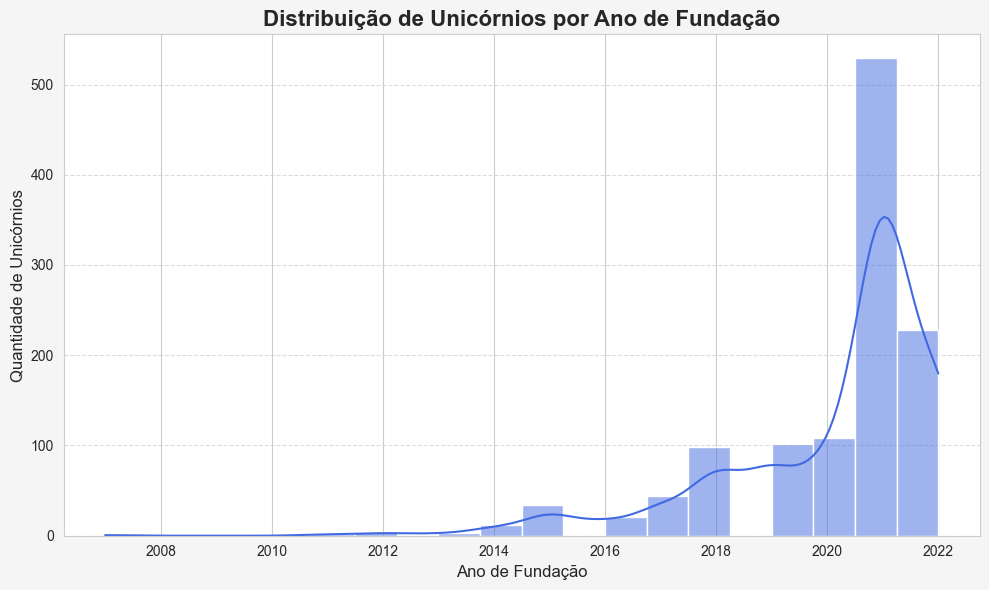

In [172]:

plt.figure(figsize=(10,6), facecolor='whitesmoke')
sns.histplot(base_dados['Ano'], bins=20, kde=True, color='royalblue')
plt.title('Distribuição de Unicórnios por Ano de Fundação', fontsize=16, fontweight='bold')
plt.xlabel('Ano de Fundação', fontsize=12)
plt.ylabel('Quantidade de Unicórnios', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
#verificando os tipos de setores em %
base_dados['setor'].value_counts(normalize=True)

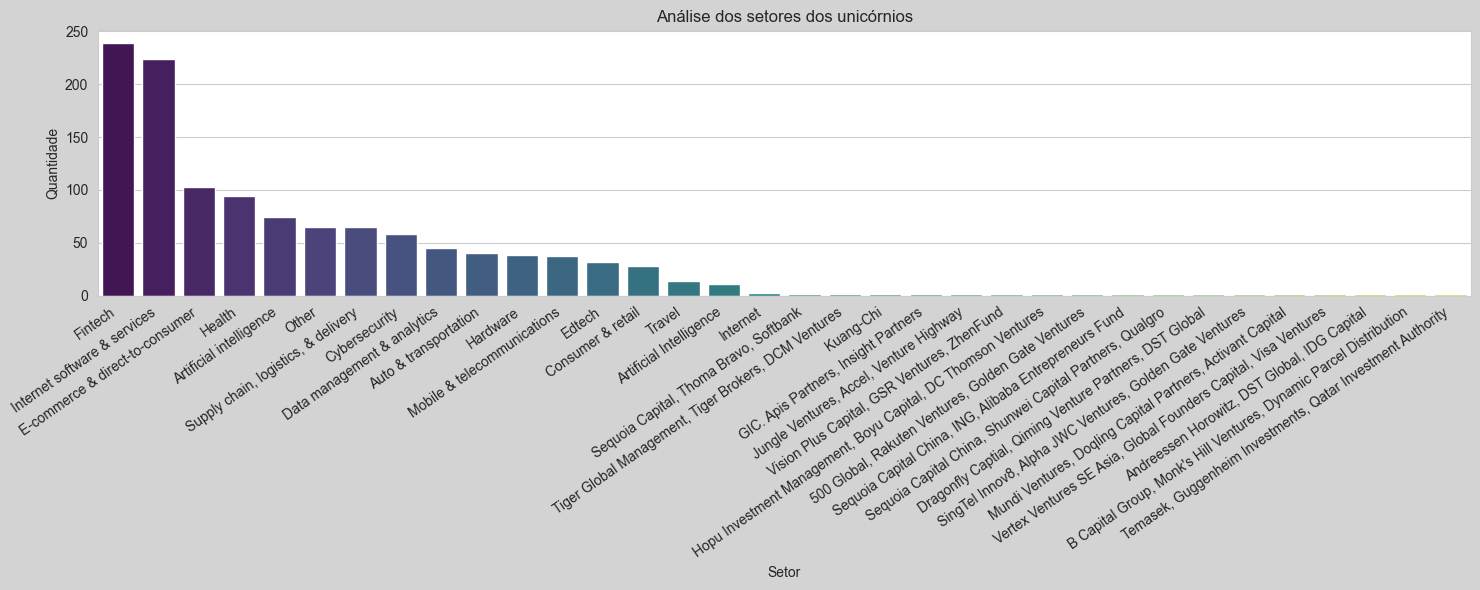

In [ ]:
plt.figure(figsize=(15,6), facecolor='lightgray')  
plt.title('Análise dos setores dos unicórnios')

sns.barplot(
    x=base_dados['Setor'].value_counts().index,
    y=base_dados['Setor'].value_counts().values,
    palette='viridis'
)

plt.ylabel('Quantidade')
plt.xlabel('Setor')
plt.xticks(rotation=35, ha='right')

plt.tight_layout()
plt.show()



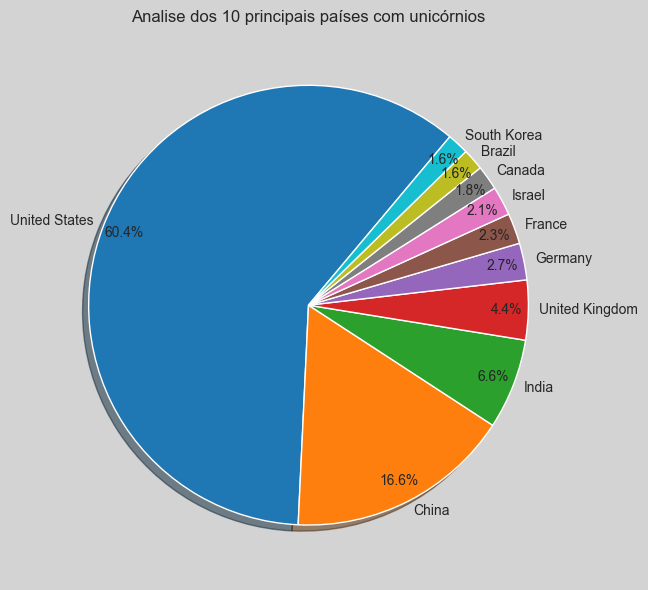

In [132]:
# Seleciona os 10 principais países
top_10 = analise.head(10)

plt.figure(figsize=(10,6), facecolor='lightgray')
plt.title('Analise dos 10 principais países com unicórnios')

plt.pie(
    top_10,
    labels=top_10.index,
    shadow=True,
    startangle=50,
    autopct='%1.1f%%',
    pctdistance=0.90,
    labeldistance=1.05
)
plt.tight_layout()
plt.show()

In [135]:
# conversao para datetime
base_dados['Data_entrada'] = pd.to_datetime(base_dados['Data_entrada'])
base_dados['Data_entrada'].head()

0   2017-04-07
1   2012-12-01
2   2018-07-03
3   2014-01-23
4   2018-01-08
Name: Data_entrada, dtype: datetime64[ns]

In [ ]:
#criando colunas de mes e ano
base_dados['Mes']= base_dados['Data_entrada'].dt.month
base_dados['Ano']= base_dados['Data_entrada'].dt.year
base_dados.head()

,Nome,Valor (US$),Data_entrada,Pais,City,Setor,Investidores,Mes,Ano
0,ByteDance,$140,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,SpaceX,$127,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,SHEIN,$100,2018-07-03,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",7,2018
3,Stripe,$95,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
4,Canva,$40,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [144]:
# tabela analitica
analise_agrupada=base_dados.groupby(by=['Pais','Ano', 'Mes','Nome']).count().reset_index()

In [145]:
# Selecionando os dados do Brasil e ordenando por ano
analise_agrupada.loc[analise_agrupada['Pais'] == 'Brazil'].sort_values(by='Ano', ascending=False)

,Pais,Ano,Mes,Nome,Valor (US$),Data_entrada,City,Setor,Investidores
32,Brazil,2022,5,Dock,1,1,1,1,1
31,Brazil,2022,2,Neon,1,1,1,1,1
26,Brazil,2021,8,Nuvemshop,1,1,1,1,1
29,Brazil,2021,10,CargoX,1,1,1,1,1
30,Brazil,2021,12,Olist,1,1,1,1,1
27,Brazil,2021,8,Unico,1,1,1,1,1
25,Brazil,2021,1,MadeiraMadeira,1,1,1,1,1
28,Brazil,2021,9,CloudWalk,1,1,1,1,1
24,Brazil,2020,12,Creditas,1,1,1,1,1
23,Brazil,2020,12,C6 Bank,1,1,1,1,1


In [ ]:
# Convertendo a coluna 'Valor (US$)' para float
base_dados['Valor (US$)'] = base_dados['Valor (US$)'].apply(lambda x: x.replace('$', '')).astype(float)

In [152]:
base_dados.head()

,Nome,Valor (US$),Data_entrada,Pais,City,Setor,Investidores,Mes,Ano
0,ByteDance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,SpaceX,127.0,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,SHEIN,100.0,2018-07-03,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",7,2018
3,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [164]:
# Agrupa por 'Pais' e soma apenas a coluna 'Valor (US$)' e ordena pelo valor
base_dados.groupby(['Pais'])['Valor (US$)'].sum().reset_index().sort_values('Valor (US$)', ascending=False)

,Pais,Valor (US$)
46,United States,2069.89
9,China,678.59
45,United Kingdom,205.45
20,India,202.92
18,Germany,80.88
17,France,58.42
1,Australia,54.40
7,Canada,49.23
23,Israel,48.02
6,Brazil,40.08


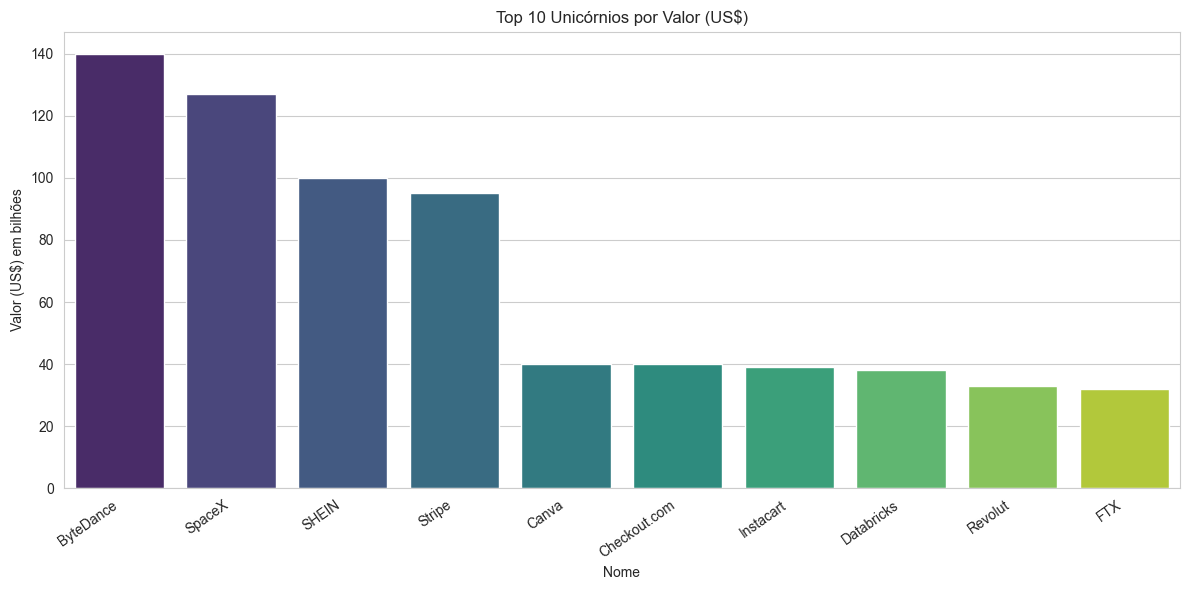

: 

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=base_dados[['Nome', 'Valor (US$)']].sort_values(by='Valor (US$)', ascending=False).head(10),
    x='Nome',
    y='Valor (US$)',
    palette='viridis'
)
plt.title('Top 10 Unicórnios por Valor (US$)')
plt.xlabel('Nome')
plt.ylabel('Valor (US$) em bilhões')
plt.xticks(rotation=35, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
##Conclusão
"""""
🧠 Conclusão
A análise dos dados de startups unicórnios até setembro de 2022 revelou alguns padrões e insights relevantes sobre o cenário global de inovação e investimentos:

📈 Explosão recente de unicórnios: Observa-se um crescimento expressivo no número de startups que se tornaram unicórnios a partir de 2018, com destaque para os anos de 2020 e 2021, provavelmente impulsionados por avanços tecnológicos, digitalização forçada pela pandemia e alto volume de investimentos de risco.

💼 Setores dominantes: O setor de Fintech lidera com folga, seguido por Internet Services e E-commerce. Esses setores refletem a tendência global de transformação digital e novas formas de consumo e serviços financeiros.

🌎 Concentração geográfica: Os Estados Unidos representam mais de 60% dos unicórnios globais, mostrando seu domínio no ecossistema de inovação. Países como China, Índia e Reino Unido aparecem em seguida, mas com presença bem menor.

💰 Top unicórnios por valor: Startups como ByteDance (TikTok), SpaceX e SHEIN lideram em valuation, indicando o alto valor de empresas com base tecnológica, grande escala de usuários e inovação disruptiva.
"""

